In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Linear Separable, Noise

In [111]:
X = [2,4,3,6,5,5,6,1,3,2,5,4,2,3]
Y = [1,3,2,5,4,2,3,2,4,3,6,5,5,6]
Class = ['c1','c1','c1','c1','c1','c1','c1','c2','c2','c2','c2','c2','c2','c2']

In [112]:
df = pd.DataFrame({
    'X':X,
    'Y':Y,
    'Class':Class
})
df.index = np.arange(1, len(df)+1)
df.head()

,X,Y,Class
1,2,1,c1
2,4,3,c1
3,3,2,c1
4,6,5,c1
5,5,4,c1


In [113]:
df_new = pd.DataFrame({
    'X':[8,10],
    'Y':[2,4],
    'Class':['c1','c1']
})
df_new.head()

,X,Y,Class
0,8,2,c1
1,10,4,c1


In [114]:
df = pd.concat([df, df_new])
df.reset_index()

,index,X,Y,Class
0,1,2,1,c1
1,2,4,3,c1
2,3,3,2,c1
3,4,6,5,c1
4,5,5,4,c1
5,6,5,2,c1
6,7,6,3,c1
7,8,1,2,c2
8,9,3,4,c2
9,10,2,3,c2


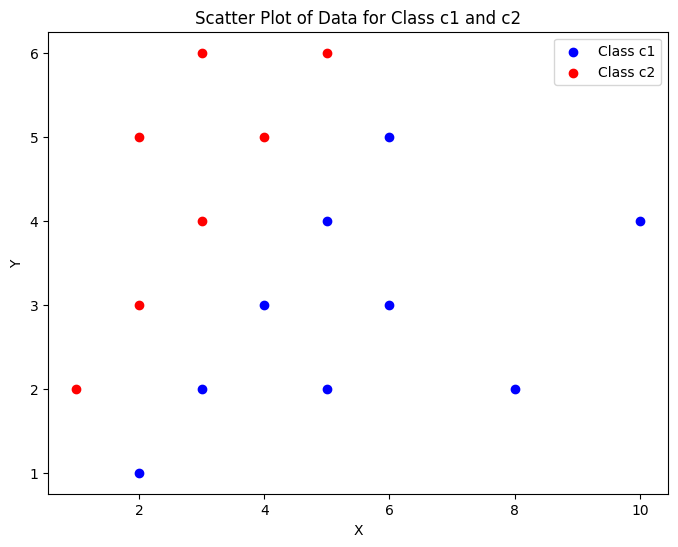

In [115]:
plt.figure(figsize=(8, 6))
plt.scatter(df[df['Class'] == 'c1']['X'], df[df['Class'] == 'c1']['Y'], color='blue', label='Class c1')
plt.scatter(df[df['Class'] == 'c2']['X'], df[df['Class'] == 'c2']['Y'], color='red', label='Class c2')
plt.title('Scatter Plot of Data for Class c1 and c2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Guasian Bayes, Multinomial Naive Bayes

Accuracy of Bayes Model: 60.00%
Accuracy of Naive Bayes Model: 100.00%
Predictions with Bayes: [1 1 0 0 1]
Predictions with Naive Bayes: [0 0 0 0 1]


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


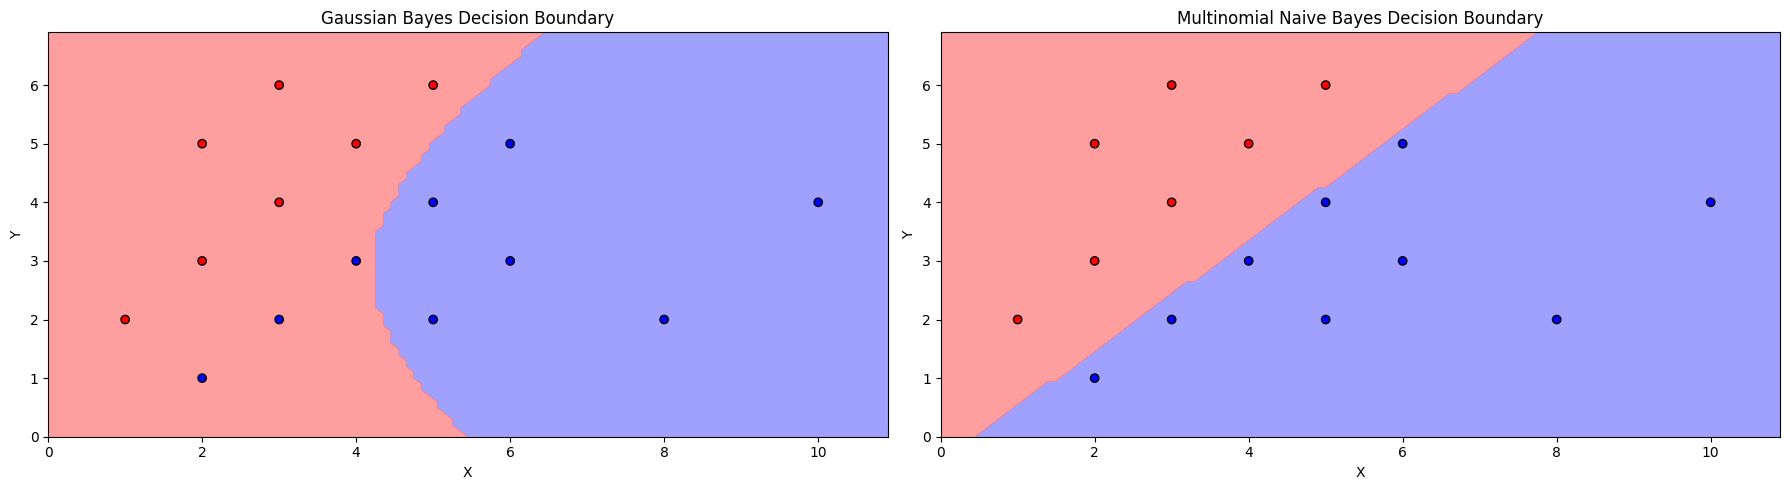

In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Convert class labels to numbers
df['Class'] = df['Class'].map({'c1': 0, 'c2': 1})
# Separate features and labels
X_data = df[['X', 'Y']]
y_data = df['Class']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# 1. Bayes Model (GaussianNB)
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)

# Predict using Bayes Model
y_pred_bayes = bayes_model.predict(X_test)

# Accuracy of the Bayes Model
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print(f'Accuracy of Bayes Model: {accuracy_bayes * 100:.2f}%')

# 2. Naive Bayes Model (MultinomialNB)
# Since our data is numerical, we are using GaussianNB for the most appropriate model. 
# However, MultinomialNB is used here just to demonstrate a different method for discrete data.
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Predict using Naive Bayes Model
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

# Accuracy of the Naive Bayes Model
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
print(f'Accuracy of Naive Bayes Model: {accuracy_naive_bayes * 100:.2f}%')

# Displaying predictions
print("Predictions with Bayes:", y_pred_bayes)
print("Predictions with Naive Bayes:", y_pred_naive_bayes)


# Function to plot decision boundary for Naive Bayes models
def plot_decision_boundary(model, X_data, y_data, title):
    # Create a grid of points (in a meshgrid) to evaluate the model over a region
    x_min, x_max = X_data['X'].min() - 1, X_data['X'].max() + 1
    y_min, y_max = X_data['Y'].min() - 1, X_data['Y'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Flatten the grid to pass through the model
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour (decision boundary)
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bwr, levels=np.linspace(0, 1, 3))
    plt.scatter(X_data['X'], X_data['Y'], c=y_data, cmap=plt.cm.bwr, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')

# Plotting decision boundaries for each Naive Bayes model
plt.figure(figsize=(18, 5))

plt.subplot(121)
plot_decision_boundary(bayes_model, X_data, y_data, 'Gaussian Bayes Decision Boundary')

plt.subplot(122)
plot_decision_boundary(naive_bayes_model, X_data, y_data, 'Multinomial Naive Bayes Decision Boundary')

plt.tight_layout()
plt.show()


Guasian Bayes sensitive to outlier

## Linear Regression, Lasso, Ridge

Linear Regression - MSE: 0.1048, MAE: 0.2864
Lasso Regression - MSE: 0.1221, MAE: 0.2964
Ridge Regression - MSE: 0.1045, MAE: 0.2862


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


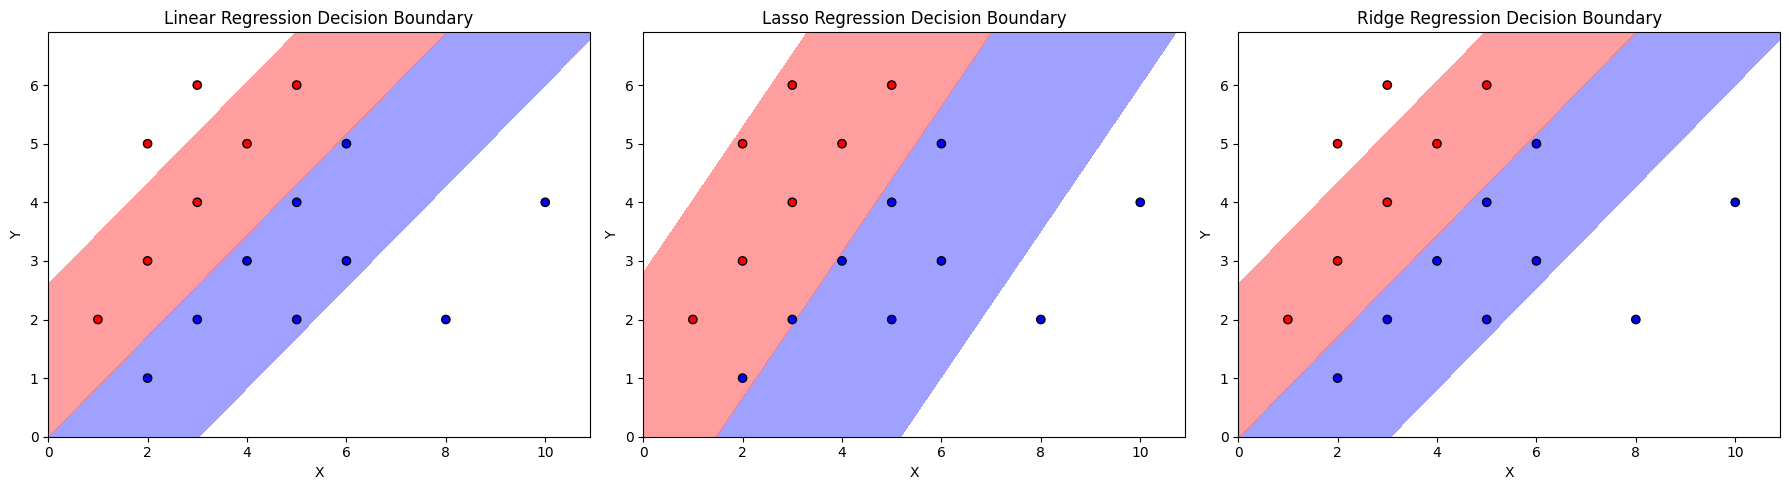

In [117]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Linear Regression (Without Regularization)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions with linear model
y_pred_linear = linear_model.predict(X_test)

# Calculate MSE and MAE for linear regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print(f'Linear Regression - MSE: {mse_linear:.4f}, MAE: {mae_linear:.4f}')

# 2. Lasso Regression (L1 Regularization)
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization parameter
lasso_model.fit(X_train, y_train)

# Predictions with lasso model
y_pred_lasso = lasso_model.predict(X_test)

# Calculate MSE and MAE for lasso regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Lasso Regression - MSE: {mse_lasso:.4f}, MAE: {mae_lasso:.4f}')

# 3. Ridge Regression (L2 Regularization)
ridge_model = Ridge(alpha=0.1)  # alpha is the regularization parameter
ridge_model.fit(X_train, y_train)

# Predictions with ridge model
y_pred_ridge = ridge_model.predict(X_test)

# Calculate MSE and MAE for ridge regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Ridge Regression - MSE: {mse_ridge:.4f}, MAE: {mae_ridge:.4f}')


# Function to plot decision boundary
def plot_decision_boundary(model, X_data, y_data, title):
    # Create a grid of points (in a meshgrid) to evaluate the model over a region
    x_min, x_max = X_data['X'].min() - 1, X_data['X'].max() + 1
    y_min, y_max = X_data['Y'].min() - 1, X_data['Y'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Flatten the grid to pass through the model
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour (decision boundary)
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bwr, levels=np.linspace(0, 1, 3))
    plt.scatter(X_data['X'], X_data['Y'], c=y_data, cmap=plt.cm.bwr, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')

# Plotting decision boundaries for each model
plt.figure(figsize=(18, 5))

plt.subplot(131)
plot_decision_boundary(linear_model, X_data, y_data, 'Linear Regression Decision Boundary')

plt.subplot(132)
plot_decision_boundary(lasso_model, X_data, y_data, 'Lasso Regression Decision Boundary')

plt.subplot(133)
plot_decision_boundary(ridge_model, X_data, y_data, 'Ridge Regression Decision Boundary')

plt.tight_layout()
plt.show()


Lasso shows more error rate with outlier than other linear regression models

## Logistic Regression

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


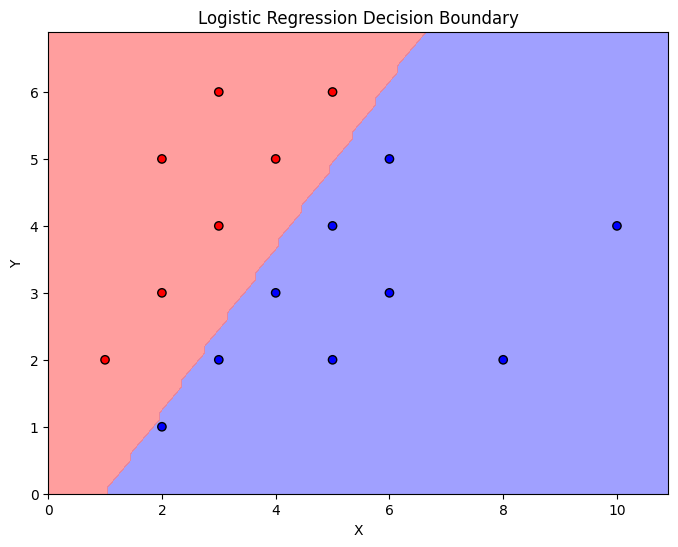

In [118]:
from sklearn.linear_model import LogisticRegression

# 1. Logistic Regression Model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Function to plot decision boundary for Logistic Regression
def plot_decision_boundary(model, X_data, y_data, title):
    # Create a grid of points (in a meshgrid) to evaluate the model over a region
    x_min, x_max = X_data['X'].min() - 1, X_data['X'].max() + 1
    y_min, y_max = X_data['Y'].min() - 1, X_data['Y'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Flatten the grid to pass through the model
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour (decision boundary)
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bwr, levels=np.linspace(0, 1, 3))
    plt.scatter(X_data['X'], X_data['Y'], c=y_data, cmap=plt.cm.bwr, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')

# Plotting decision boundary for Logistic Regression model
plt.figure(figsize=(8, 6))
plot_decision_boundary(logreg_model, X_data, y_data, 'Logistic Regression Decision Boundary')
plt.show()


logistic Regression Robust against outliers

## Support Vector Machine

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


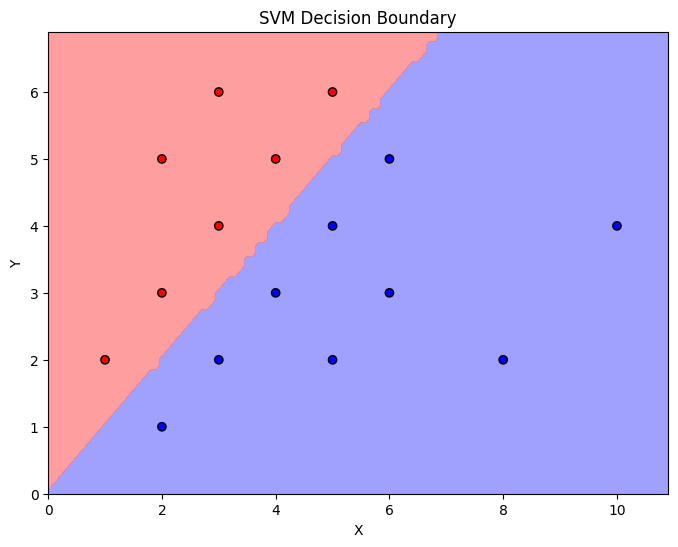

In [119]:
from sklearn.svm import SVC

# 1. SVM Model (Support Vector Machine)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Function to plot decision boundary for SVM model
def plot_decision_boundary(model, X_data, y_data, title):
    # Create a grid of points (in a meshgrid) to evaluate the model over a region
    x_min, x_max = X_data['X'].min() - 1, X_data['X'].max() + 1
    y_min, y_max = X_data['Y'].min() - 1, X_data['Y'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Flatten the grid to pass through the model
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour (decision boundary)
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bwr, levels=np.linspace(0, 1, 3))
    plt.scatter(X_data['X'], X_data['Y'], c=y_data, cmap=plt.cm.bwr, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')

# Plotting decision boundary for SVM model
plt.figure(figsize=(8, 6))
plot_decision_boundary(svm_model, X_data, y_data, 'SVM Decision Boundary')
plt.show()


SVM robust against outliers

## Perceptron

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


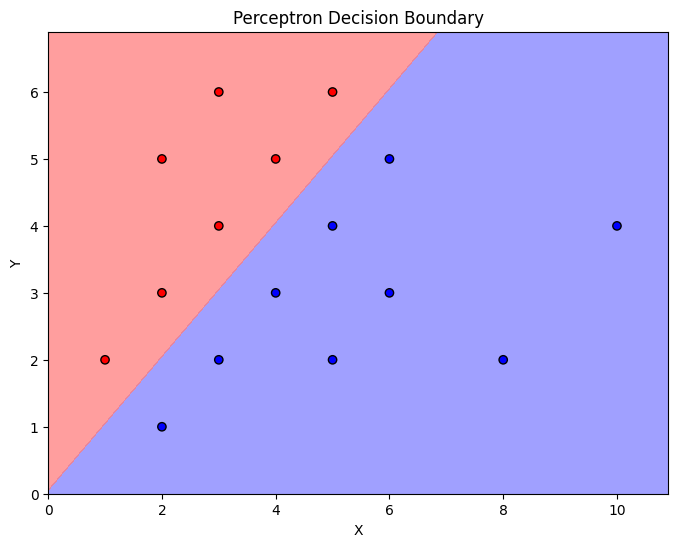

In [120]:
from sklearn.linear_model import Perceptron

# 1. Perceptron Model
perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)

# Function to plot decision boundary for Perceptron model
def plot_decision_boundary(model, X_data, y_data, title):
    # Create a grid of points (in a meshgrid) to evaluate the model over a region
    x_min, x_max = X_data['X'].min() - 1, X_data['X'].max() + 1
    y_min, y_max = X_data['Y'].min() - 1, X_data['Y'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Flatten the grid to pass through the model
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour (decision boundary)
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bwr, levels=np.linspace(0, 1, 3))
    plt.scatter(X_data['X'], X_data['Y'], c=y_data, cmap=plt.cm.bwr, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')

# Plotting decision boundary for Perceptron model
plt.figure(figsize=(8, 6))
plot_decision_boundary(perceptron_model, X_data, y_data, 'Perceptron Decision Boundary')
plt.show()


perceptron robust against outliers